<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/4.%20Public%20Health%20and%20Safety/Weather_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content:
1. [Preparing Project](#1)
    * 1.1 [Connection to Kaggle](#1.1)
    * 1.2 [Downloading Dataset](#1.2)
    * 1.3 [Import Libraries](#1.3)
    * 1.4 [Import Dataset](#1.4)
2. [Exploring Dataset](#2)
    * 2.1 [Understanding the Variables](#2.1)
    * 2.2 [Unique Values](#2.2)
    * 2.3 [Missing Values](#2.3)
3. [Get Samples](#3)
4. [Exploratory Data Analysis](#3)
    * 3.1 [Distribution](#3.1)

[Dataset Link](https://www.kaggle.com/datasets/julianjose/minute-weather)

# 1. Preparing Project <a id=1></a>

## 1.1 Connection to Kaggle <a id=1.1></a>

In [1]:
from google.colab import userdata
import os

os.environ['KAGGLE_PASS'] = userdata.get("KAGGLE_PASS")
os.environ['KAGGLE_USERNAME'] = userdata.get("KAGGLE_USERNAME")

## 1.2 Downloading Dataset <a id=1.2></a>

In [2]:
!kaggle datasets download -d julianjose/minute-weather

Dataset URL: https://www.kaggle.com/datasets/julianjose/minute-weather
License(s): unknown
 92% 24.0M/26.2M [00:01<00:00, 23.4MB/s]
100% 26.2M/26.2M [00:01<00:00, 17.6MB/s]


In [3]:
!unzip /content/minute-weather.zip

Archive:  /content/minute-weather.zip
  inflating: minute_weather.csv      


## 1.3 Import Libraries <a id=1.3></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Import Dataset <a id=1.4></a>

In [22]:
df = pd.read_csv('/content/minute_weather.csv')
df.head(1).T

,0
rowID,0
hpwren_timestamp,2011-09-10 00:00:49
air_pressure,912.3
air_temp,64.76
avg_wind_direction,97.0
avg_wind_speed,1.2
max_wind_direction,106.0
max_wind_speed,1.6
min_wind_direction,85.0
min_wind_speed,1.0


# 2. Exploring Dataset <a id=2></a>

In [7]:
df.shape

(1587257, 13)

In [8]:
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [9]:
df.dtypes

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object

In [12]:
df.duplicated().sum()

0

## 2.1 Understanding the Variables <a id=2.1></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rowID               1587257 non-null  int64  
 1   hpwren_timestamp    1587257 non-null  object 
 2   air_pressure        1587257 non-null  float64
 3   air_temp            1587257 non-null  float64
 4   avg_wind_direction  1586824 non-null  float64
 5   avg_wind_speed      1586824 non-null  float64
 6   max_wind_direction  1586824 non-null  float64
 7   max_wind_speed      1586824 non-null  float64
 8   min_wind_direction  1586824 non-null  float64
 9   min_wind_speed      1586824 non-null  float64
 10  rain_accumulation   1587256 non-null  float64
 11  rain_duration       1587256 non-null  float64
 12  relative_humidity   1587257 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


#### DataFrame Variable Descriptions
1. **rowID**
   - **Type**: int64
   - **Description**: A unique identifier for each row in the dataset.

2. **hpwren_timestamp**
   - **Type**: object
   - **Description**: The timestamp when the data was recorded. It is in string format and represents the date and time.

3. **air_pressure**
   - **Type**: float64
   - **Description**: The atmospheric pressure measured at the time of recording, in units of pressure (typically millibars or pascals).

4. **air_temp**
   - **Type**: float64
   - **Description**: The air temperature at the time of recording, measured in degrees Celsius or Fahrenheit.

5. **avg_wind_direction**
   - **Type**: float64
   - **Description**: The average wind direction over a specific period, measured in degrees. Missing values indicate the absence of wind direction data.

6. **avg_wind_speed**
   - **Type**: float64
   - **Description**: The average wind speed over a specific period, measured in units of speed (typically meters per second or kilometers per hour). Missing values indicate the absence of wind speed data.

7. **max_wind_direction**
   - **Type**: float64
   - **Description**: The maximum wind direction observed during the recording period, measured in degrees. Missing values indicate the absence of wind direction data.

8. **max_wind_speed**
   - **Type**: float64
   - **Description**: The maximum wind speed observed during the recording period, measured in units of speed. Missing values indicate the absence of wind speed data.

9. **min_wind_direction**
   - **Type**: float64
   - **Description**: The minimum wind direction observed during the recording period, measured in degrees. Missing values indicate the absence of wind direction data.

10. **min_wind_speed**
    - **Type**: float64
    - **Description**: The minimum wind speed observed during the recording period, measured in units of speed. Missing values indicate the absence of wind speed data.

11. **rain_accumulation**
    - **Type**: float64
    - **Description**: The total amount of rainfall accumulated during the recording period, measured in millimeters or inches.

12. **rain_duration**
    - **Type**: float64
    - **Description**: The total duration of rainfall during the recording period, measured in seconds or minutes.

13. **relative_humidity**
    - **Type**: float64
    - **Description**: The relative humidity at the time of recording, measured as a percentage. It indicates the amount of moisture in the air relative to the maximum amount the air can hold at that temperature.

## 2.2 Unique Values <a id=2.2></a>

In [16]:
pd.DataFrame(df.nunique(), columns=['Unique Values'])

,Unique Values
rowID,1587257
hpwren_timestamp,1554478
air_pressure,246
air_temp,378
avg_wind_direction,360
avg_wind_speed,244
max_wind_direction,360
max_wind_speed,266
min_wind_direction,360
min_wind_speed,222


## 2.3 Missing Values <a id=2.3></a>

In [24]:
df.isna().sum()

rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
rain_accumulation     0
rain_duration         0
relative_humidity     0
dtype: int64

In [23]:
# Handling Missing value by drop NaN
df = df.dropna()

# 3. Get Samples <a id=3></a>

In [33]:
# Get 10000 samples from df.
df_sample = df.sample(n=10000, random_state=42)

# Display the first few rows of the sample to verify

df_sample = df_sample.reset_index(drop=True)
df_sample.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,1340886,2014-03-23 16:45:30,917.7,58.10,272.0,2.0,283.0,3.0,230.0,0.6,0.0,0.0,66.5
1,1426619,2014-05-22 08:11:18,915.7,50.72,207.0,2.0,216.0,2.3,201.0,1.5,0.0,0.0,82.4
2,1139147,2013-10-18 03:25:48,916.5,63.50,45.0,0.9,57.0,1.2,35.0,0.7,0.0,0.0,24.7
3,539997,2012-08-27 22:04:06,917.2,79.52,12.0,1.8,38.0,2.4,356.0,1.2,0.0,0.0,22.5
4,1139176,2013-10-18 03:54:48,916.4,63.50,9.0,1.3,23.0,1.4,353.0,1.0,0.0,0.0,25.8


# 3. Exploratory Data Analysis <a id=3></a>

## 3.1 Distribution <a id=3.1></a>

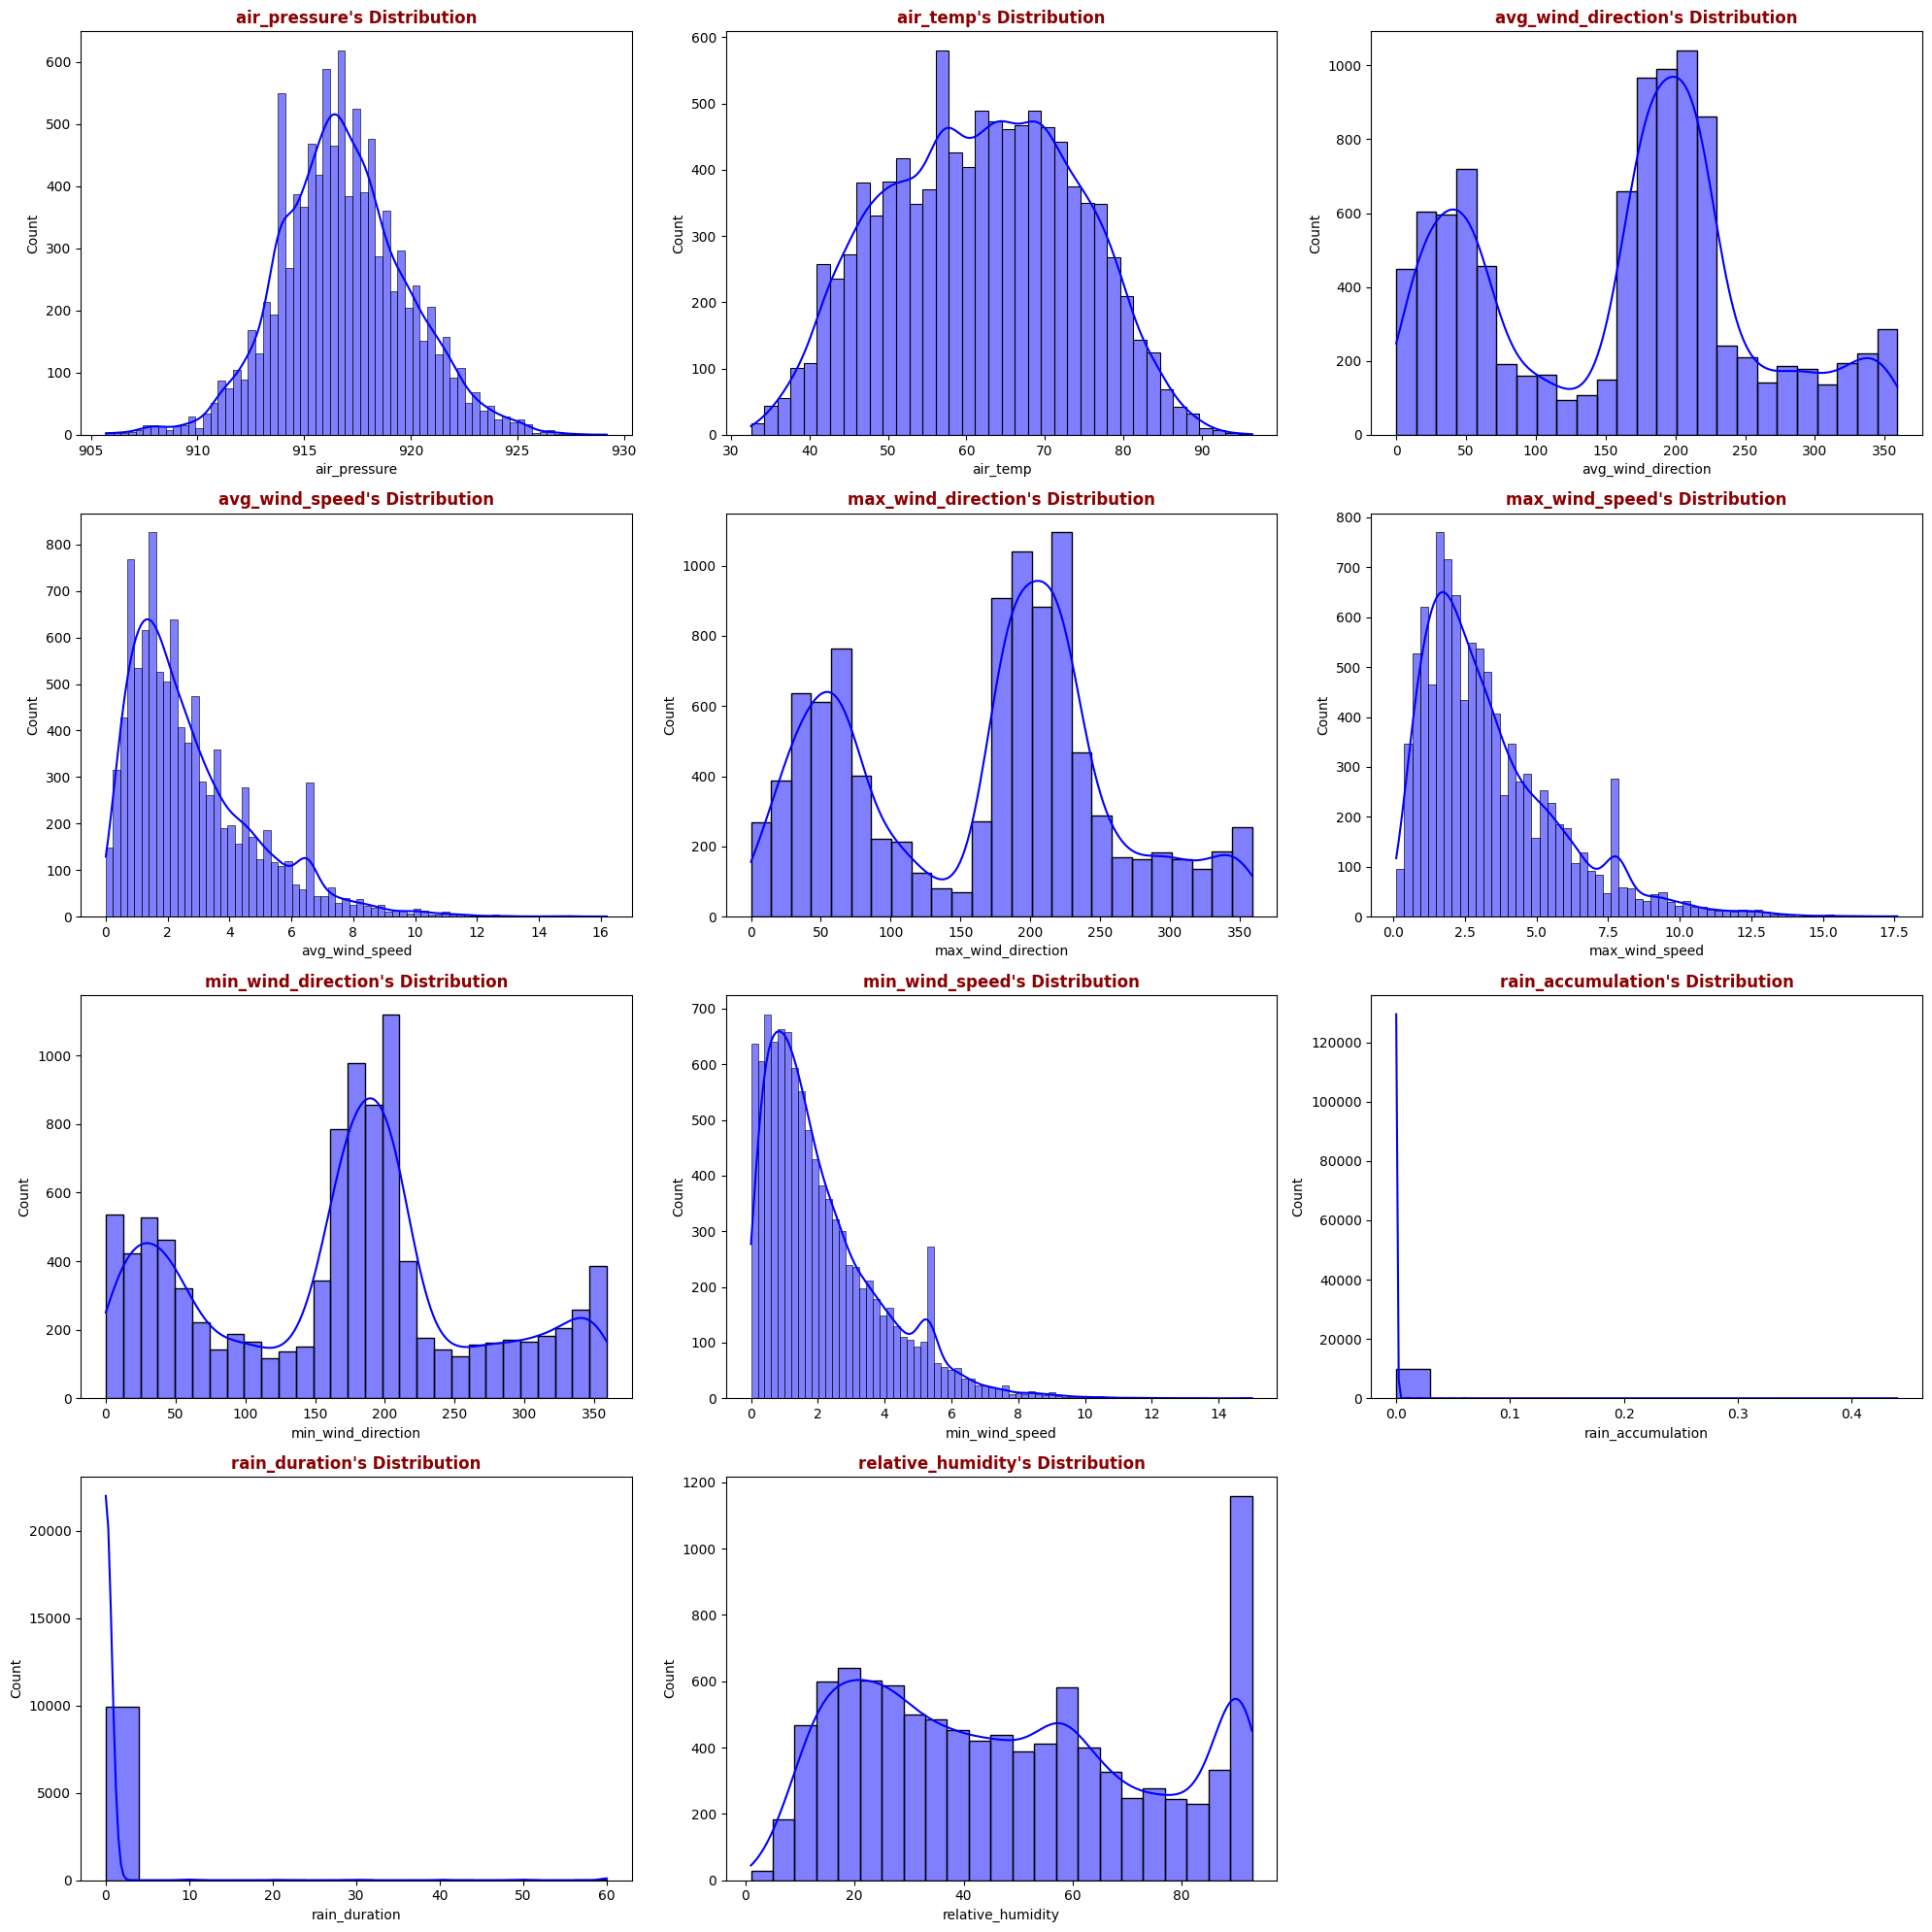

In [53]:
sfeatures = ['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity']

plt.figure(figsize=(20, 20))
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_sample[column], kde=True, bins='auto', color='Blue')
    plt.title(f"{column}'s Distribution", fontdict={'color': 'darkred', 'weight':'bold'})
plt.tight_layout()
plt.show()